In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load customer profile data
customers_df = pd.read_csv('Customers.csv')

# Load transaction data
transactions_df = pd.read_csv('Transactions.csv')

# Merge datasets on 'CustomerID' to combine both profile and transaction data
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

# Check for missing values
merged_df.isnull().sum()

# Normalize the data for clustering (scaling numeric features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df.select_dtypes(include=[float, int]))

# The merged dataset will now contain both customer profile and transaction data
scaled_df = pd.DataFrame(scaled_features, columns=merged_df.select_dtypes(include=[float, int]).columns)


C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

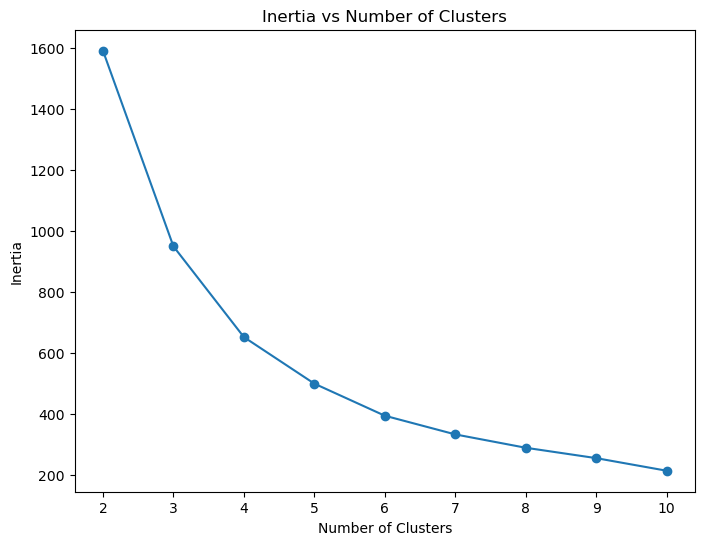

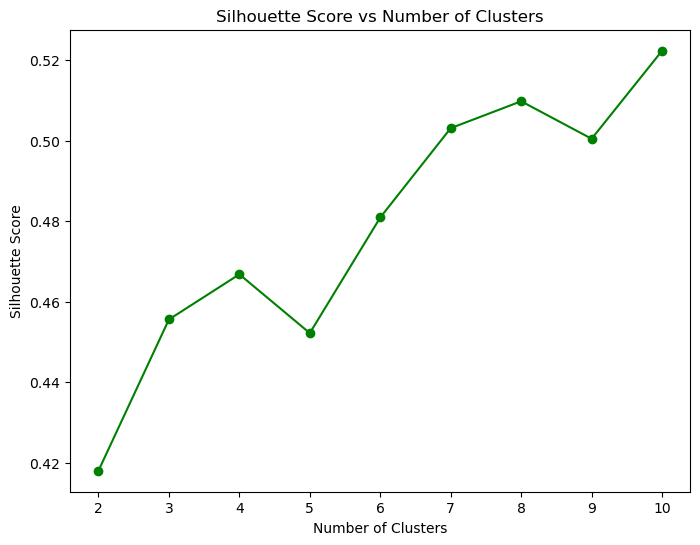

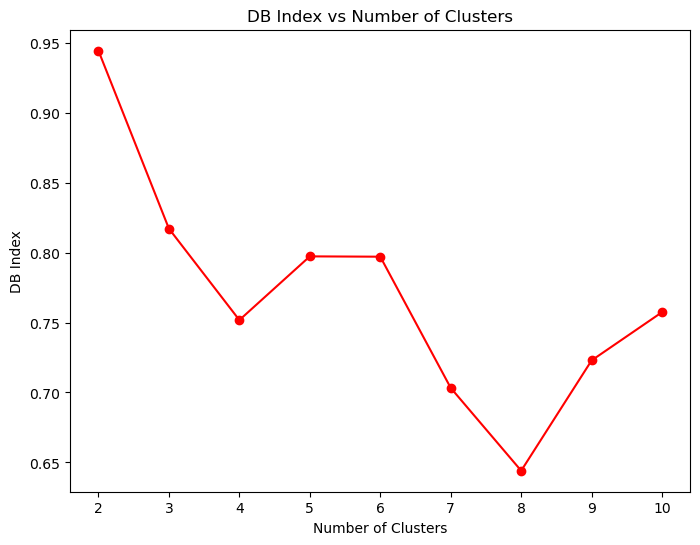

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to apply K-Means clustering and calculate DB Index
def apply_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

# Test different values of K (between 2 and 10)
inertia = []
silhouette_scores = []
db_indexes = []

for k in range(2, 11):
    labels, kmeans = apply_kmeans(k, scaled_df)
    
    # Calculate inertia (Within-cluster sum of squares)
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    from sklearn.metrics import silhouette_score
    silhouette = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette)
    
    # Calculate DB Index (Davies-Bouldin Index)
    from sklearn.metrics import davies_bouldin_score
    db_index = davies_bouldin_score(scaled_df, labels)
    db_indexes.append(db_index)

# Plot Inertia vs Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores vs Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plot DB Index vs Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_indexes, marker='o', color='red')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()


C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


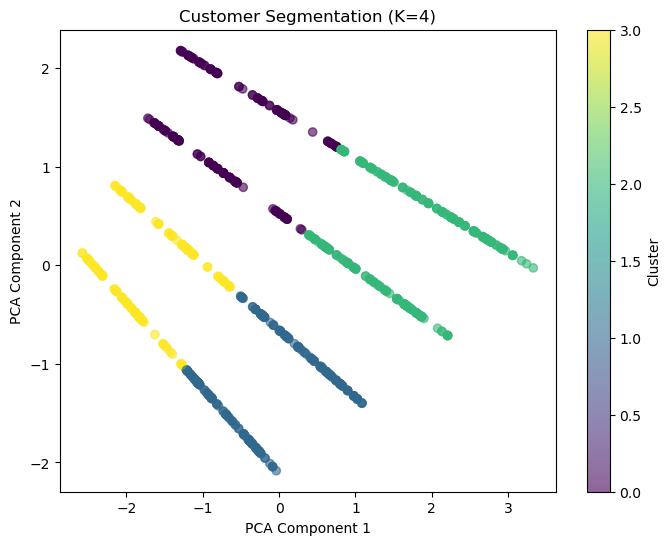

In [8]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Visualize clusters for a chosen K value (let's say K=4)
optimal_k = 4
labels, kmeans = apply_kmeans(optimal_k, scaled_df)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title(f'Customer Segmentation (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
# Add cluster labels to the original dataframe
merged_df['Cluster'] = labels

# Save the dataframe with cluster labels
merged_df.to_csv('Customer_Segments.csv', index=False)

# Display the first few rows of the result
merged_df.head()


,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,0
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,1
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,1
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Function to apply K-Means clustering and calculate DB Index and Silhouette Score
def calculate_metrics(data, max_k=10):
    db_indexes = []
    silhouette_scores = []
    inertia = []

    for k in range(2, max_k + 1):  # Evaluate for K = 2 to 10
        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        
        # Calculate DB Index (Davies-Bouldin Index)
        db_index = davies_bouldin_score(data, labels)
        db_indexes.append(db_index)
        
        # Calculate Silhouette Score
        silhouette = silhouette_score(data, labels)
        silhouette_scores.append(silhouette)
        
        # Calculate Inertia (Within-cluster sum of squares)
        inertia.append(kmeans.inertia_)
    
    return db_indexes, silhouette_scores, inertia

# Assuming `scaled_df` is your scaled customer data
db_indexes, silhouette_scores, inertia = calculate_metrics(scaled_df)

# Print the metrics for different values of k
for k in range(2, 11):
    print(f"K = {k}:")
    print(f"  DB Index: {db_indexes[k-2]:.4f}")
    print(f"  Silhouette Score: {silhouette_scores[k-2]:.4f}")
    print(f"  Inertia: {inertia[k-2]:.4f}")
    print("")

# Identify the optimal number of clusters based on the lowest DB Index and highest Silhouette Score
optimal_k_db = db_indexes.index(min(db_indexes)) + 2  # Add 2 because we start from k=2
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 for the same reason

print(f"Optimal number of clusters based on DB Index: {optimal_k_db}")
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")


C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhavy\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

K = 2:
  DB Index: 0.9442
  Silhouette Score: 0.4180
  Inertia: 1591.7507

K = 3:
  DB Index: 0.8171
  Silhouette Score: 0.4556
  Inertia: 949.7342

K = 4:
  DB Index: 0.7517
  Silhouette Score: 0.4668
  Inertia: 651.9847

K = 5:
  DB Index: 0.7973
  Silhouette Score: 0.4522
  Inertia: 499.1452

K = 6:
  DB Index: 0.7970
  Silhouette Score: 0.4809
  Inertia: 393.8829

K = 7:
  DB Index: 0.7032
  Silhouette Score: 0.5031
  Inertia: 332.5540

K = 8:
  DB Index: 0.6441
  Silhouette Score: 0.5098
  Inertia: 288.7218

K = 9:
  DB Index: 0.7229
  Silhouette Score: 0.5004
  Inertia: 254.6765

K = 10:
  DB Index: 0.7574
  Silhouette Score: 0.5223
  Inertia: 213.3247

Optimal number of clusters based on DB Index: 8
Optimal number of clusters based on Silhouette Score: 10


In [12]:
# Inertia values for each k
inertia_values = [1591.7507, 949.7342, 651.9847, 499.1452, 393.8829, 332.5540, 288.7218, 254.6765, 213.3247]

# Find the optimal K for Inertia (lowest value)
optimal_k_inertia = inertia_values.index(min(inertia_values)) + 2  # Add 2 because we start from k=2

print(f"Optimal number of clusters based on Inertia: {optimal_k_inertia}")


Optimal number of clusters based on Inertia: 10
